<a href="https://colab.research.google.com/github/IgorEisenlohr/MVP-sprint-2/blob/main/MVP_sprint_2_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Aluno **Igor Miranda Eisenlohr**
* Problema escolhido foi referente a uma aplicação de **Classificação binária** com MachineLearning.
* A base de dados contempla casos de pacientes que sobreviveram a  **Covid-19** e pacientes que, infelizmente, vieram a óbito
* Os modelos utilizados serão os baseados em Árvores de decisão, como: **Arvore de decisão**, **Floresta Aleatoria**, **Ada Boost** e **XGBoost**

# Clone do repositório do github

In [111]:
!git clone https://github.com/IgorEisenlohr/MVP-sprint-2.git

fatal: destination path 'MVP-sprint-2' already exists and is not an empty directory.


# Bibliotecas

instalando o pandas-profiling para facilitar a análise das features

In [2]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 21.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7d6f43e42fc7cc2568023b222c1ef7d5fd500e09402f6ee4d1393acd9eb11062
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

importando as bibliotecas pontecialmente utilizadas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn.model_selection import train_test_split, KFold, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import xgboost as xgb
import plotly.express as px
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import datetime
import seaborn as sns

from pandas_profiling import ProfileReport
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

<ipython-input-3-0dc94e810115>:19: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


# Leitura do arquivo completo de casos de covid-19 em Vitória - ES

In [4]:
data = pd.read_excel('/content/MVP-sprint-2/coviddata.xlsx')
data.head()

DataNotificacao DataCadastro DataDiagnostico DataColeta_RT_PCR  \
0      2023-02-09   2023-02-09      2023-02-07               NaN   
1      2023-01-25   2023-01-25      2023-01-22               NaN   
2      2023-01-20   2023-01-20      2023-01-19               NaN   
3      2023-01-11   2023-01-11      2023-01-10               NaN   
4      2023-01-09   2023-01-09      2023-01-07               NaN   

  DataColetaTesteRapido DataColetaSorologia DataColetaSorologiaIGG  \
0                   NaN                 NaN                    NaN   
1                   NaN                 NaN                    NaN   
2                   NaN                 NaN                    NaN   
3                   NaN                 NaN                    NaN   
4                   NaN                 NaN                    NaN   

  DataEncerramento DataObito Classificacao  ... ViagemBrasil  \
0              NaN       NaT      Suspeito  ...          Não   
1              NaN       NaT      Suspeito  ...          Não   
2              NaN       NaT      Suspeito  ...          Não   
3              NaN       NaT      Suspeito  ...          Não   
4              NaN       NaT      Suspeito  ...          Não   

  ViagemInternacional ProfissionalSaude PossuiDeficiencia MoradorDeRua  \
0                 Não               Não               Não          Não   
1                 Não               Não               Não          Não   
2                 Não               Não               Não          Não   
3                 Não               Não               Não          Não   
4                 Não               Não               Não          Não   

  ResultadoRT_PCR ResultadoTesteRapido ResultadoSorologia  \
0   Não Informado        Não Informado      Não Informado   
1   Não Informado        Não Informado      Não Informado   
2   Não Informado        Não Informado      Não Informado   
3   Não Informado        Não Informado      Não Informado   
4   Não Informado        Não Informado      Não Informado   

  ResultadoSorologia_IGG TipoTesteRapido  
0          Não Informado   Não Informado  
1          Não Informado   Não Informado  
2          Não Informado   Não Informado  
3          Não Informado   Não Informado  
4          Não Informado   Não Informado  

[5 rows x 45 columns]

In [5]:
data.shape

(574745, 45)

## Filtrando apenas para os casos confirmados da doença

In [6]:
data.Classificacao.unique()

array(['Suspeito', 'Descartados', 'Síndrome Gripal não Especificada',
       'Confirmados'], dtype=object)

In [7]:
data_confirmados = data.query('Classificacao == "Confirmados"')
data_confirmados.shape

(148561, 45)

In [8]:
data_confirmados = data_confirmados.drop(columns=['Classificacao'])
data_confirmados.to_csv('coviddata.csv', index= False)

# Lendo arquivo csv apenas com os casos confirmados

In [9]:
df = pd.read_csv('coviddata.csv')
df.head()

DataNotificacao DataCadastro DataDiagnostico DataColeta_RT_PCR  \
0      2021-05-19   2021-05-24      2021-05-19               NaN   
1      2021-12-19   2021-12-20      2021-12-13               NaN   
2      2021-12-19   2021-12-20      2021-12-19               NaN   
3      2021-12-19   2021-12-20      2021-12-12               NaN   
4      2021-12-19   2021-12-20      2021-12-15               NaN   

  DataColetaTesteRapido DataColetaSorologia DataColetaSorologiaIGG  \
0                   NaN                 NaN                    NaN   
1                   NaN                 NaN                    NaN   
2                   NaN                 NaN                    NaN   
3                   NaN                 NaN                    NaN   
4                   NaN                 NaN                    NaN   

  DataEncerramento DataObito Evolucao  ...   ViagemBrasil ViagemInternacional  \
0              NaN       NaN        -  ...  Não Informado       Não Informado   
1              NaN       NaN     Cura  ...            Não                 Não   
2              NaN       NaN     Cura  ...            Não                 Não   
3              NaN       NaN     Cura  ...            Não                 Não   
4              NaN       NaN     Cura  ...            Não                 Não   

  ProfissionalSaude PossuiDeficiencia MoradorDeRua ResultadoRT_PCR  \
0          Ignorado               Não          Não   Não Informado   
1               Não               Não          Não   Não Informado   
2               Não               Não          Não   Não Informado   
3               Não               Não          Não   Não Informado   
4               Não               Não          Não   Não Informado   

  ResultadoTesteRapido ResultadoSorologia ResultadoSorologia_IGG  \
0        Não Informado      Não Informado          Não Informado   
1        Não Informado      Não Informado          Não Informado   
2        Não Informado      Não Informado          Não Informado   
3        Não Informado      Não Informado          Não Informado   
4        Não Informado      Não Informado          Não Informado   

  TipoTesteRapido  
0   Não Informado  
1   Não Informado  
2   Não Informado  
3   Não Informado  
4   Não Informado  

[5 rows x 44 columns]

In [10]:
df.shape

(148561, 44)

# Variável resposta

In [11]:
df.Evolucao.unique()

array(['-', 'Cura', 'Ignorado', 'Óbito pelo COVID-19',
       'Óbito por outras causas'], dtype=object)

## Limitando para apenas os casos que interessam ao modelo final (Casos encerrados com Cura ou óbito pelo Covid-19)

In [12]:
df.StatusNotificacao.unique()

array(['Em Aberto', 'Encerrado'], dtype=object)

In [13]:
df = df.query('StatusNotificacao == "Encerrado"').query('Evolucao == "Óbito pelo COVID-19" or Evolucao == "Cura"').drop(columns=['StatusNotificacao'])

In [14]:
df.Evolucao.value_counts()

Cura                   146879
Óbito pelo COVID-19      1451
Name: Evolucao, dtype: int64

# Manipulando as variáveis timestamp

In [15]:
data_col = df.filter(regex="^Data").columns
data_col

Index(['DataNotificacao', 'DataCadastro', 'DataDiagnostico',
       'DataColeta_RT_PCR', 'DataColetaTesteRapido', 'DataColetaSorologia',
       'DataColetaSorologiaIGG', 'DataEncerramento', 'DataObito'],
      dtype='object')

Para tentar identificar um padrão no comportamento dos dados de acordo com a data, vou identifcar os pacientes com o ano e o mês de ocorrência, ao invés de utilizar a data espcifica de cada um

In [16]:
mes_diagnostico = []
ano_diagnostico = []
for i in df.DataDiagnostico:
    ano, mes, dia = i.split("-")
    mes_diagnostico.append(mes)
    ano_diagnostico.append(ano)

df['Mes'] =  mes_diagnostico
df['Ano'] = ano_diagnostico

In [112]:
df.head()

Evolucao CriterioConfirmacao Municipio           Bairro   FaixaEtaria  \
17     Cura        Laboratorial   VITORIA  JARDIM DA PENHA  20 a 29 anos   
18     Cura        Laboratorial   VITORIA       TABUAZEIRO  60 a 69 anos   
19     Cura        Laboratorial   VITORIA   GRANDE VITÓRIA  30 a 39 anos   
20     Cura        Laboratorial   VITORIA     FONTE GRANDE  70 a 79 anos   
21     Cura        Laboratorial   VITORIA    SANTO ANTÔNIO  80 a 89 anos   

        IdadeNaDataNotificacao Sexo   RacaCor  \
17    22 anos, 5 meses, 2 dias    F  Ignorado   
18   61 anos, 7 meses, 15 dias    F  Ignorado   
19  31 anos, 11 meses, 17 dias    M    Branca   
20   70 anos, 2 meses, 24 dias    M    Branca   
21   82 anos, 8 meses, 18 dias    F     Parda   

                                         Escolaridade       Gestante  ...  \
17                                           Ignorado            Não  ...   
18                                           Ignorado            Não  ...   
19  1ª a 4ª série incompleta do EF (antigo primári...  Não se aplica  ...   
20                                           Ignorado  Não se aplica  ...   
21                                           Ignorado            Não  ...   

   ProfissionalSaude PossuiDeficiencia MoradorDeRua ResultadoRT_PCR  \
17               Não               Não          Não        Positivo   
18               Não               Não          Não        Positivo   
19               Não               Sim          Não        Positivo   
20               Não               Não          Não   Não Informado   
21               Não               Não          Não   Não Informado   

   ResultadoTesteRapido ResultadoSorologia ResultadoSorologia_IGG  \
17        Não Informado      Não Informado          Não Informado   
18        Não Informado      Não Informado          Não Informado   
19        Não Informado      Não Informado          Não Informado   
20        Não Informado      Não Informado          Não Informado   
21        Não Informado      Não Informado          Não Informado   

   TipoTesteRapido Mes   Ano  
17   Não Informado  07  2022  
18   Não Informado  02  2022  
19   Não Informado  01  2022  
20   Não Informado  06  2022  
21   Não Informado  06  2022  

[5 rows x 36 columns]

In [18]:
df.drop(columns=data_col, inplace=True)
df.head()

Evolucao CriterioConfirmacao Municipio           Bairro   FaixaEtaria  \
17     Cura        Laboratorial   VITORIA  JARDIM DA PENHA  20 a 29 anos   
18     Cura        Laboratorial   VITORIA       TABUAZEIRO  60 a 69 anos   
19     Cura        Laboratorial   VITORIA   GRANDE VITÓRIA  30 a 39 anos   
20     Cura        Laboratorial   VITORIA     FONTE GRANDE  70 a 79 anos   
21     Cura        Laboratorial   VITORIA    SANTO ANTÔNIO  80 a 89 anos   

        IdadeNaDataNotificacao Sexo   RacaCor  \
17    22 anos, 5 meses, 2 dias    F  Ignorado   
18   61 anos, 7 meses, 15 dias    F  Ignorado   
19  31 anos, 11 meses, 17 dias    M    Branca   
20   70 anos, 2 meses, 24 dias    M    Branca   
21   82 anos, 8 meses, 18 dias    F     Parda   

                                         Escolaridade       Gestante  ...  \
17                                           Ignorado            Não  ...   
18                                           Ignorado            Não  ...   
19  1ª a 4ª série incompleta do EF (antigo primári...  Não se aplica  ...   
20                                           Ignorado  Não se aplica  ...   
21                                           Ignorado            Não  ...   

   ProfissionalSaude PossuiDeficiencia MoradorDeRua ResultadoRT_PCR  \
17               Não               Não          Não        Positivo   
18               Não               Não          Não        Positivo   
19               Não               Sim          Não        Positivo   
20               Não               Não          Não   Não Informado   
21               Não               Não          Não   Não Informado   

   ResultadoTesteRapido ResultadoSorologia ResultadoSorologia_IGG  \
17        Não Informado      Não Informado          Não Informado   
18        Não Informado      Não Informado          Não Informado   
19        Não Informado      Não Informado          Não Informado   
20        Não Informado      Não Informado          Não Informado   
21        Não Informado      Não Informado          Não Informado   

   TipoTesteRapido Mes   Ano  
17   Não Informado  07  2022  
18   Não Informado  02  2022  
19   Não Informado  01  2022  
20   Não Informado  06  2022  
21   Não Informado  06  2022  

[5 rows x 36 columns]

# Definindo dados de treino e teste

In [19]:
df_train, df_test  = train_test_split(df, test_size=0.2, random_state=0, stratify = df.Evolucao)

print(f'Tamanho dos dados de treino: {df_train.shape}')
print(f'Tamanho dos dados de teste: {df_test.shape}')

Tamanho dos dados de treino: (118664, 36)
Tamanho dos dados de teste: (29666, 36)


# Pre processamento dos dados de treino

In [20]:
profile = ProfileReport(df_train, title="Profiling Report")
profile.to_notebook_iframe()
profile.to_file(output_file="Report-covid19.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Primeiro passo que pode ser observado foi a presença de muitos valores como: "Não Informado", "Ignorado", "-" para preencher valores ausentes. Para facilitar o tratamento desses dados, vamos converte-los para nan

In [21]:
df_train.replace('Ignorado', np.NaN, inplace=True)
df_train.replace('Não Informado', np.NaN, inplace=True)
df_train.replace('-', np.NaN, inplace=True)
df_train.head()

Evolucao CriterioConfirmacao Municipio          Bairro   FaixaEtaria  \
95713      Cura        Laboratorial   VITORIA   MATA DA PRAIA  30 a 39 anos   
74275      Cura        Laboratorial   VITORIA        DA PENHA  30 a 39 anos   
112744     Cura        Laboratorial   VITORIA  MÁRIO CYPRESTE  20 a 29 anos   
105752     Cura        Laboratorial   VITORIA         MARUÍPE   05 a 9 anos   
13300      Cura        Laboratorial   VITORIA          CENTRO  20 a 29 anos   

            IdadeNaDataNotificacao Sexo RacaCor  \
95713     33 anos, 4 meses, 8 dias    M  Branca   
74275    31 anos, 0 meses, 15 dias    F   Preta   
112744  20 anos, 11 meses, 10 dias    M   Preta   
105752   6 anos, 11 meses, 26 dias    F   Parda   
13300    23 anos, 5 meses, 13 dias    M   Parda   

                                             Escolaridade       Gestante  ...  \
95713                          Educação superior completa  Não se aplica  ...   
74275                          Educação superior completa    3º trimeste  ...   
112744                                                NaN  Não se aplica  ...   
105752  1ª a 4ª série incompleta do EF (antigo primári...            Não  ...   
13300   Ensino médio completo (antigo colegial ou 2º g...  Não se aplica  ...   

       ProfissionalSaude PossuiDeficiencia MoradorDeRua ResultadoRT_PCR  \
95713                Não               Não          Não        Positivo   
74275                Não               Não          Não        Negativo   
112744               Não               Não          Não        Positivo   
105752               Não               Não          Não        Positivo   
13300                Não               Não          Não             NaN   

       ResultadoTesteRapido ResultadoSorologia ResultadoSorologia_IGG  \
95713                   NaN                NaN                    NaN   
74275              Positivo                NaN                    NaN   
112744                  NaN                NaN                    NaN   
105752                  NaN                NaN                    NaN   
13300              Positivo                NaN                    NaN   

              TipoTesteRapido Mes   Ano  
95713                     NaN  02  2022  
74275                     NaN  08  2020  
112744                    NaN  02  2021  
105752                    NaN  03  2021  
13300   Teste rápido Antígeno  11  2021  

[5 rows x 36 columns]

In [22]:
df_test.replace('Ignorado', np.NaN, inplace=True)
df_test.replace('Não Informado', np.NaN, inplace=True)
df_test.replace('-', np.NaN, inplace=True)

# DF train Profile Report para analisar os dados ausentes

In [23]:
profile = ProfileReport(df_train, title="Profiling Report with NaN values")
profile.to_notebook_iframe()
profile.to_file(output_file="Report-covid19-2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<ul>
<li>-> Municipio apresenta valor constante
<li>-> Datas de notificacao, Cadastro e Diagnostico muitos valores distintos, criação da variável apenas para representar o mês/ano de diagnóstico para cada paciente
<li>-> Datas de coleta de exames e resultado dos exames: muitos valores ausentes (pacientes q nao realizaram determinado exame não aparecia nenhuma data)
<li>-> Idade na data de notificação: se apresenta como string em um formato com idade, mês e dia e a faixa etária facilita na identificação de padrões
<li>-> Variável resposta (Evolução) esta desbalanceada(99%/1%)
<li>-> Critério de confirmação predominante o Laboratorial (verificar se todo mundo confirmado de maneira laboratorial realizou algum exame)
<li>-> 81 Bairros diferentes (é necessária essa variável?)
</ul>


numero de nulls

In [24]:
df_train.isnull().sum().sort_values(ascending=False)

ResultadoSorologia         115542
ResultadoSorologia_IGG     113607
TipoTesteRapido             65850
ResultadoRT_PCR             63542
ResultadoTesteRapido        62689
Escolaridade                50167
RacaCor                     48116
FicouInternado              37091
ViagemInternacional         36322
ViagemBrasil                34966
ProfissionalSaude           12313
Gestante                     3835
MoradorDeRua                 1478
PossuiDeficiencia            1304
DorGarganta                   234
Cefaleia                      233
Coriza                        232
DificuldadeRespiratoria       229
Diarreia                      228
Tosse                         228
Febre                         226
ComorbidadePulmao             190
ComorbidadeObesidade          188
ComorbidadeTabagismo          183
ComorbidadeDiabetes           181
ComorbidadeRenal              179
ComorbidadeCardio             178
CriterioConfirmacao            67
FaixaEtaria                     4
Mes           

# Variável constante do municipio

In [25]:
df_train.drop(columns=['Municipio'], inplace=True)
df_test.drop(columns=['Municipio'], inplace=True)

# Variável Idade na data

como a idade exata apresenta um formato muito preciso e já temos a faixa etária para identificar a idade, utilizarei apenas a faixa etária

In [26]:
df_train.drop(columns=['IdadeNaDataNotificacao'], inplace=True)
df_test.drop(columns=['IdadeNaDataNotificacao'], inplace=True)

# Avaliar dados inconsistentes

In [27]:
df_train.shape

(118664, 34)

## Casos com todas as comorbidades e sintomas nulos

In [28]:
comorbidades = ['ComorbidadePulmao','ComorbidadeCardio','ComorbidadeRenal','ComorbidadeDiabetes','ComorbidadeTabagismo','ComorbidadeObesidade']
sintomas = ['Febre','DificuldadeRespiratoria','Tosse','DorGarganta','Diarreia','Cefaleia','Coriza']
comorbidades_e_sintomas = comorbidades + sintomas

In [29]:
df_train.dropna(subset=comorbidades_e_sintomas, how='all', inplace=True)

## Casos confirmados de forma laboratorial mas não apresentaram nenhum teste positivo

In [30]:
res_col = df.filter(regex="^Resultado").columns
for r in res_col:
    print(f'{r} valores -> {df_train[r].unique()}')
    print()

ResultadoRT_PCR valores -> ['Positivo' 'Negativo' nan 'Inconclusivo']

ResultadoTesteRapido valores -> [nan 'Positivo' 'Negativo' 'Inconclusivo']

ResultadoSorologia valores -> [nan 'Reagente' 'Não Reagente' 'Inconclusivo']

ResultadoSorologia_IGG valores -> [nan 'Reagente' 'Não Reagente' 'Inconclusivo']



In [31]:
lab_inconsistente = df_train.query('CriterioConfirmacao == "Laboratorial"').query('ResultadoRT_PCR != "Positivo" and ResultadoTesteRapido != "Positivo" and ResultadoSorologia != "Reagente" and ResultadoSorologia_IGG != "Reagente"')
lab_inconsistente.shape

(2882, 34)

2882 casos confirmados de forma laboratorial, porém nenhum exame deu positivo ou reagente.

In [32]:
df_train = df_train.drop(lab_inconsistente.index)

Como os resultados foram confirmados e removemos os casos inconsistentes. Realizarei o drop das colunas de resultados

In [33]:
df_train = df_train.drop(columns=res_col)
df_test = df_test.drop(columns=res_col)

In [34]:
df_train = df_train.drop(columns=['TipoTesteRapido'])
df_test = df_test.drop(columns=['TipoTesteRapido'])

# Colunas com valores inconsistentes

In [35]:
df_train.isnull().sum().sort_values(ascending=False)

Escolaridade               48964
RacaCor                    46999
FicouInternado             36748
ViagemInternacional        35984
ViagemBrasil               34642
ProfissionalSaude          12157
Gestante                    3620
MoradorDeRua                1438
PossuiDeficiencia           1269
DorGarganta                   77
Cefaleia                      76
Coriza                        75
DificuldadeRespiratoria       72
Tosse                         71
Diarreia                      71
Febre                         69
CriterioConfirmacao           67
ComorbidadePulmao             33
ComorbidadeObesidade          31
ComorbidadeTabagismo          26
ComorbidadeDiabetes           24
ComorbidadeRenal              22
ComorbidadeCardio             21
FaixaEtaria                    4
Mes                            0
Evolucao                       0
Sexo                           0
Bairro                         0
Ano                            0
dtype: int64

## Escolaridade

In [36]:
df_train.Escolaridade.unique()

array(['Educação superior completa', nan,
       '1ª a 4ª série incompleta do EF (antigo primário ou 1º grau)',
       'Ensino médio completo (antigo colegial ou 2º grau )',
       'Não se aplica', 'Educação superior incompleta',
       'Ensino fundamental completo (antigo ginásio ou 1º grau)',
       '5ª à 8ª série incompleta do EF (antigo ginásio ou 1º grau)',
       'Ensino médio incompleto (antigo colegial ou 2º grau )',
       '4ª série completa do EF (antigo primário ou 1º grau)',
       'Analfabeto'], dtype=object)

Variável se apresenta de maneira inconsistente e o grau de educação não interfere na saúde do paciente

In [37]:
df_train = df_train.drop(columns=['Escolaridade'])
df_test = df_test.drop(columns=['Escolaridade'])

## Gestante

In [38]:
df_train.Gestante.unique()

array(['Não se aplica', '3º trimeste', 'Não', nan, '2º trimeste',
       '1º trimeste', 'Idade gestacional ignorada'], dtype=object)

In [39]:
df_train.Gestante = df_train.Gestante.apply(lambda x: "Não" if x=="Não" or x=="Não se aplica" or x==np.nan else "Sim")

In [40]:
df_train.Gestante.unique()

array(['Não', 'Sim'], dtype=object)

In [41]:
df_train.groupby('Gestante').Evolucao.value_counts(normalize=True)

Gestante  Evolucao           
Não       Cura                   0.989662
          Óbito pelo COVID-19    0.010338
Sim       Cura                   0.999022
          Óbito pelo COVID-19    0.000978
Name: Evolucao, dtype: float64

Pode-se observar que pacientes com  gravidez ou não, apresentaram  taxa de sobrevivência elevada e muito proxima, então parece que a variável não influenciou muito na sobrevivencia da covid 19, assim, será retirada do conjunto de dados

In [42]:
df_train = df_train.drop(columns=['Gestante'])
df_test = df_test.drop(columns=['Gestante'])

# Comorbidades e sintomas

In [43]:
for c in comorbidades:
    print(f'Quantidade de valores ausentes: {df_train[c].isnull().sum()}')
    print(df_train[c].value_counts(normalize=True))
    print()

Quantidade de valores ausentes: 33
Não    0.97351
Sim    0.02649
Name: ComorbidadePulmao, dtype: float64

Quantidade de valores ausentes: 21
Não    0.880203
Sim    0.119797
Name: ComorbidadeCardio, dtype: float64

Quantidade de valores ausentes: 22
Não    0.996929
Sim    0.003071
Name: ComorbidadeRenal, dtype: float64

Quantidade de valores ausentes: 24
Não    0.95135
Sim    0.04865
Name: ComorbidadeDiabetes, dtype: float64

Quantidade de valores ausentes: 26
Não    0.986237
Sim    0.013763
Name: ComorbidadeTabagismo, dtype: float64

Quantidade de valores ausentes: 31
Não    0.974843
Sim    0.025157
Name: ComorbidadeObesidade, dtype: float64



Preencher os valores ausentes das comorbidades com a moda "Não" para os poucos casos com valores ausentes

In [44]:
for c in comorbidades:
    df_train[c].fillna('Não', inplace=True)
    df_test[c].fillna('Não', inplace=True)

df_train[comorbidades].isnull().sum()

ComorbidadePulmao       0
ComorbidadeCardio       0
ComorbidadeRenal        0
ComorbidadeDiabetes     0
ComorbidadeTabagismo    0
ComorbidadeObesidade    0
dtype: int64

In [45]:
for s in sintomas:
    print(f'Quantidade de valores ausentes: {df_train[s].isnull().sum()}')
    print(df_train[s].value_counts(normalize=True))
    print()

Quantidade de valores ausentes: 69
Não    0.66283
Sim    0.33717
Name: Febre, dtype: float64

Quantidade de valores ausentes: 72
Não    0.922313
Sim    0.077687
Name: DificuldadeRespiratoria, dtype: float64

Quantidade de valores ausentes: 71
Sim    0.527546
Não    0.472454
Name: Tosse, dtype: float64

Quantidade de valores ausentes: 77
Não    0.637752
Sim    0.362248
Name: DorGarganta, dtype: float64

Quantidade de valores ausentes: 71
Não    0.914291
Sim    0.085709
Name: Diarreia, dtype: float64

Quantidade de valores ausentes: 76
Não    0.574492
Sim    0.425508
Name: Cefaleia, dtype: float64

Quantidade de valores ausentes: 75
Não    0.574297
Sim    0.425703
Name: Coriza, dtype: float64



In [46]:
for s in sintomas:
    if s == 'Tosse':
        df_train[s].fillna('Sim', inplace=True)
        df_test[s].fillna('Sim', inplace=True)
    else:
        df_train[s].fillna('Não', inplace=True)
        df_test[s].fillna('Não', inplace=True)

df_train.head()

Evolucao CriterioConfirmacao          Bairro   FaixaEtaria Sexo  \
95713      Cura        Laboratorial   MATA DA PRAIA  30 a 39 anos    M   
74275      Cura        Laboratorial        DA PENHA  30 a 39 anos    F   
112744     Cura        Laboratorial  MÁRIO CYPRESTE  20 a 29 anos    M   
105752     Cura        Laboratorial         MARUÍPE   05 a 9 anos    F   
13300      Cura        Laboratorial          CENTRO  20 a 29 anos    M   

       RacaCor Febre DificuldadeRespiratoria Tosse Coriza  ...  \
95713   Branca   Não                     Não   Não    Não  ...   
74275    Preta   Não                     Não   Não    Não  ...   
112744   Preta   Não                     Não   Sim    Não  ...   
105752   Parda   Sim                     Não   Sim    Não  ...   
13300    Parda   Sim                     Sim   Sim    Sim  ...   

       ComorbidadeTabagismo ComorbidadeObesidade FicouInternado ViagemBrasil  \
95713                   Não                  Não            Não          Sim   
74275                   Não                  Não            Sim          NaN   
112744                  Não                  Não            Não          Não   
105752                  Não                  Não            Não          Não   
13300                   Não                  Não            Não          Não   

       ViagemInternacional ProfissionalSaude PossuiDeficiencia MoradorDeRua  \
95713                  Não               Não               Não          Não   
74275                  Não               Não               Não          Não   
112744                 Não               Não               Não          Não   
105752                 Não               Não               Não          Não   
13300                  Não               Não               Não          Não   

       Mes   Ano  
95713   02  2022  
74275   08  2020  
112744  02  2021  
105752  03  2021  
13300   11  2021  

[5 rows x 27 columns]

## RacaCor

In [47]:
df_train.RacaCor.value_counts()

Branca      30626
Parda       30397
Preta        6079
Amarela      1509
Indigena       15
Name: RacaCor, dtype: int64

como forma de não inviesar o modelo de acordo com o tom de pele do paciente, optou-se por retirar a variável do modelo

In [48]:
df_train.drop(columns=['RacaCor'], inplace = True)
df_test.drop(columns=['RacaCor'], inplace = True)

## Ficou Internado

In [49]:
df_train.FicouInternado.isnull().sum()

36748

In [50]:
df_train.groupby('FicouInternado').Evolucao.value_counts(normalize=True)

FicouInternado  Evolucao           
Não             Cura                   0.997942
                Óbito pelo COVID-19    0.002058
Sim             Óbito pelo COVID-19    0.607745
                Cura                   0.392255
Name: Evolucao, dtype: float64

Percebe-se o grande impacto dessa caracteristica na sobrevivência de cada paciente. Notou-se que pacientes que passaram por internação em grande parte vieram a falecer

In [51]:
df_train.query('FicouInternado.isnull()', engine='python').Evolucao.value_counts(normalize=True)

Cura                   0.99932
Óbito pelo COVID-19    0.00068
Name: Evolucao, dtype: float64

<ul>É possível perceber que:
<li> Casos de internação -> sobrevivencia = 60%
<li> Casos de não internado -> sobrevivencia = 99,7%
<li> Casos com esse valor ausente -> sobrevivência 99,93%
</ul>

Dessa forma, pode-se dizer q os casos com esse valor ausente tendem a representar situações onde o paciente não necessitou de internação

In [52]:
df_train.FicouInternado.fillna('Não', inplace=True)
df_test.FicouInternado.fillna('Não', inplace=True)

# Bairro

In [53]:
df_train.Bairro.nunique()

81

81 bairros diferentes que quando codificados terão pesos muito diferentes na sobrevivência de um paciente, logo essas variáveis serão retiradas

In [54]:
df_train.drop(columns=['Bairro'], inplace=True)
df_test.drop(columns=['Bairro'], inplace=True)

# Faixa Etaria

In [55]:
df_train.FaixaEtaria.value_counts()

30 a 39 anos       25359
40 a 49 anos       22359
20 a 29 anos       19709
50 a 59 anos       16825
60 a 69 anos       12520
10 a 19 anos        6788
70 a 79 anos        5987
80 a 89 anos        2328
05 a 9 anos         1740
0 a 4 anos          1432
90 anos ou mais      574
Name: FaixaEtaria, dtype: int64

preencher os poucos casos com valores ausentes com a MODA da faixa etária

In [56]:
df_train.FaixaEtaria.fillna('30 a 39 anos', inplace=True)
df_test.FaixaEtaria.fillna('30 a 39 anos', inplace=True)

# Viagens dos pacientes

In [57]:
df_train.groupby('ViagemBrasil').Evolucao.value_counts(normalize=True)

ViagemBrasil  Evolucao           
Não           Cura                   0.985673
              Óbito pelo COVID-19    0.014327
Sim           Cura                   0.997490
              Óbito pelo COVID-19    0.002510
Name: Evolucao, dtype: float64

In [58]:
df_train.query('ViagemBrasil.isnull()', engine='python').Evolucao.value_counts(normalize=True)

Cura                   0.999278
Óbito pelo COVID-19    0.000722
Name: Evolucao, dtype: float64

percebe-se que os pacientes que viajaram e os que não viajaram pelo Brasil, apresentam as mesmas taxas de sobrevivência, assim como os casos com valores ausentes, a variável parece não interferir na fatalidade dos casos

In [59]:
df_train.groupby('ViagemInternacional').Evolucao.value_counts(normalize=True)

ViagemInternacional  Evolucao           
Não                  Cura                   0.985751
                     Óbito pelo COVID-19    0.014249
Sim                  Cura                   1.000000
Name: Evolucao, dtype: float64

In [60]:
df_train.query('ViagemInternacional.isnull()', engine='python').Evolucao.value_counts(normalize=True)

Cura                   0.999333
Óbito pelo COVID-19    0.000667
Name: Evolucao, dtype: float64

mesma coisa para casos com viagem internacional

In [61]:
df_train.drop(columns=['ViagemInternacional','ViagemBrasil'], inplace=True)
df_test.drop(columns=['ViagemInternacional','ViagemBrasil'], inplace=True)

# Profissional da Saúde

In [62]:
df_train.ProfissionalSaude.value_counts()

Não    96095
Sim     7373
Name: ProfissionalSaude, dtype: int64

In [63]:
df_train.groupby('ProfissionalSaude').Evolucao.value_counts(normalize=True)

ProfissionalSaude  Evolucao           
Não                Cura                   0.988241
                   Óbito pelo COVID-19    0.011759
Sim                Cura                   0.997423
                   Óbito pelo COVID-19    0.002577
Name: Evolucao, dtype: float64

In [64]:
df_train.query('ProfissionalSaude.isnull()', engine='python').Evolucao.value_counts(normalize=True)

Cura                   0.999342
Óbito pelo COVID-19    0.000658
Name: Evolucao, dtype: float64

grande maioria dos pacientes não eram profissionais da saúde e, percebe-se, também, que não interferiu na taxa de sobrevivência dos pacientes

In [65]:
df_train.drop(columns=['ProfissionalSaude'], inplace=True)
df_test.drop(columns=['ProfissionalSaude'], inplace=True)

# Morador de rua

In [66]:
df_train.MoradorDeRua.value_counts()

Não    114081
Sim       106
Name: MoradorDeRua, dtype: int64

In [67]:
df_train.groupby('MoradorDeRua').Evolucao.value_counts(normalize=True)

MoradorDeRua  Evolucao           
Não           Cura                   0.989884
              Óbito pelo COVID-19    0.010116
Sim           Cura                   0.971698
              Óbito pelo COVID-19    0.028302
Name: Evolucao, dtype: float64

In [68]:
df_train.query('MoradorDeRua.isnull()', engine='python').Evolucao.value_counts(normalize=True)

Cura    1.0
Name: Evolucao, dtype: float64

Como a amostra de casos de moradores de rua foram apenas 106 casos em mais de 115k, vou retirar a variável do df

In [69]:
df_train.drop(columns=['MoradorDeRua'], inplace=True)
df_test.drop(columns=['MoradorDeRua'], inplace=True)

# Possui Deficiencia

In [70]:
df_train.PossuiDeficiencia.value_counts()

Não    114020
Sim       336
Name: PossuiDeficiencia, dtype: int64

In [71]:
df_train.groupby('PossuiDeficiencia').Evolucao.value_counts(normalize=True)

PossuiDeficiencia  Evolucao           
Não                Cura                   0.990072
                   Óbito pelo COVID-19    0.009928
Sim                Cura                   0.925595
                   Óbito pelo COVID-19    0.074405
Name: Evolucao, dtype: float64

In [72]:
df_train.query('PossuiDeficiencia.isnull()', engine='python').Evolucao.value_counts(normalize=True)

Cura    1.0
Name: Evolucao, dtype: float64

Como os casos com valores ausentes sobreviveram em 100% e podemos perceber certa diferença entre a taxa de sobrevivencia de quem era ou não PCD, preencheremos com o valor "Não" que faz mais sentido

In [73]:
df_train.PossuiDeficiencia.fillna('Não', inplace=True)
df_test.PossuiDeficiencia.fillna('Não', inplace=True)

# Criterio Confirmação

Como ja temos a informação que os pacientes foram confirmados (pelo filtro realizado no começo do notebook), o criterio de confirmação não altera o resultado

In [74]:
df_train.drop(columns=['CriterioConfirmacao'], inplace=True)
df_test.drop(columns=['CriterioConfirmacao'], inplace=True)

# Codificação das variáveis categóricas

In [75]:
classes_cod = []
df_train_cod = df_train.copy()
df_test_cod = df_test.copy()
for i in df_train.columns:
  le = LabelEncoder()
  df_train_cod[i] = le.fit_transform(df_train[i])
  df_test_cod[i] = le.transform(df_test[i])
  classe = dict(zip(le.classes_, range(len(le.classes_))))
  classes_cod.append(classe)
  print(f'{i}:{df_train[i].nunique()}')
  print(classe)
  print()

Evolucao:2
{'Cura': 0, 'Óbito pelo COVID-19': 1}

FaixaEtaria:11
{'0 a 4 anos': 0, '05 a 9 anos': 1, '10 a 19 anos': 2, '20 a 29 anos': 3, '30 a 39 anos': 4, '40 a 49 anos': 5, '50 a 59 anos': 6, '60 a 69 anos': 7, '70 a 79 anos': 8, '80 a 89 anos': 9, '90 anos ou mais': 10}

Sexo:3
{'F': 0, 'I': 1, 'M': 2}

Febre:2
{'Não': 0, 'Sim': 1}

DificuldadeRespiratoria:2
{'Não': 0, 'Sim': 1}

Tosse:2
{'Não': 0, 'Sim': 1}

Coriza:2
{'Não': 0, 'Sim': 1}

DorGarganta:2
{'Não': 0, 'Sim': 1}

Diarreia:2
{'Não': 0, 'Sim': 1}

Cefaleia:2
{'Não': 0, 'Sim': 1}

ComorbidadePulmao:2
{'Não': 0, 'Sim': 1}

ComorbidadeCardio:2
{'Não': 0, 'Sim': 1}

ComorbidadeRenal:2
{'Não': 0, 'Sim': 1}

ComorbidadeDiabetes:2
{'Não': 0, 'Sim': 1}

ComorbidadeTabagismo:2
{'Não': 0, 'Sim': 1}

ComorbidadeObesidade:2
{'Não': 0, 'Sim': 1}

FicouInternado:2
{'Não': 0, 'Sim': 1}

PossuiDeficiencia:2
{'Não': 0, 'Sim': 1}

Mes:12
{'01': 0, '02': 1, '03': 2, '04': 3, '05': 4, '06': 5, '07': 6, '08': 7, '09': 8, '10': 9, '11': 10, '

# X e y

In [96]:
X_train = df_train_cod.drop(columns=['Evolucao'])
y_train = df_train_cod.Evolucao

X_test = df_test_cod.drop(columns=['Evolucao'])
y_test = df_test_cod.Evolucao

In [97]:
X_train.columns

Index(['FaixaEtaria', 'Sexo', 'Febre', 'DificuldadeRespiratoria', 'Tosse',
       'Coriza', 'DorGarganta', 'Diarreia', 'Cefaleia', 'ComorbidadePulmao',
       'ComorbidadeCardio', 'ComorbidadeRenal', 'ComorbidadeDiabetes',
       'ComorbidadeTabagismo', 'ComorbidadeObesidade', 'FicouInternado',
       'PossuiDeficiencia', 'Mes', 'Ano'],
      dtype='object')

In [98]:
print(f'Amostra de treino : {X_train.shape}')

Amostra de treino : (115625, 19)


In [99]:
print(f'Amostra de teste : {X_test.shape}')

Amostra de teste : (29666, 19)


# Kbest

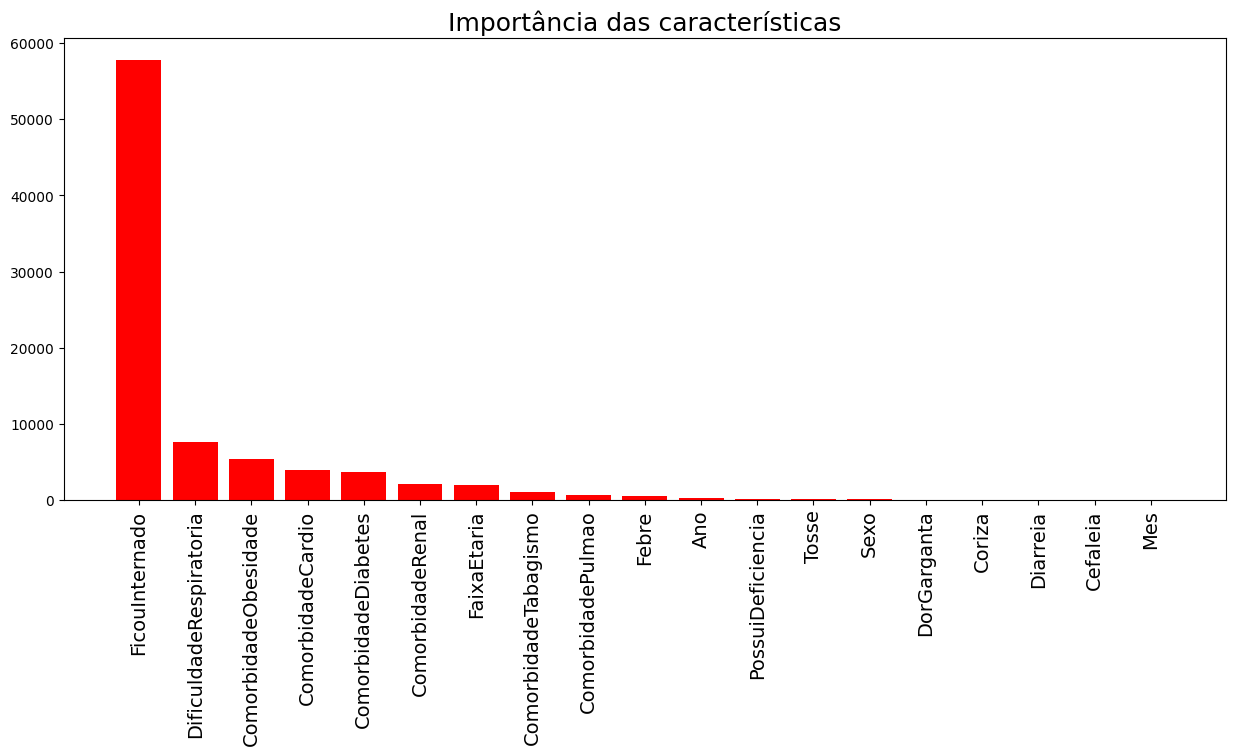

In [100]:
k_melhores = SelectKBest(score_func=chi2,k=X_train.shape[1])
kbest = k_melhores.fit_transform(X_train, y_train)
indices = np.argsort(k_melhores.scores_)[::-1]

features = []
for i in range(X_train.shape[1]):
    features.append(X_train.columns[indices[i]])
plt.figure(figsize=(15,6))
plt.bar(x=features, height=k_melhores.scores_[indices[range(X_train.shape[1])]], color='r', align='center')
plt.title('Importância das características',fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.show()


remover as variáveis com menor importância para a variável Evolução de acordo com o teste matemático do chi2

In [101]:
X_train.drop(columns=['Mes','Cefaleia','Diarreia','Coriza','DorGarganta'], inplace=True)
X_test.drop(columns=['Mes','Cefaleia','Diarreia','Coriza','DorGarganta'], inplace=True)

# Pipeline

In [131]:
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier

models = []
results = []
names = []

# stratified kfold com 5 folds
kfold = StratifiedKFold(n_splits=5, shuffle=True)

# técnica de baleanceamento por undersampling
rus = ('RandomUnderSampling',RandomUnderSampler())

# técnica de balanceamento por oversampling SMOTE
smote = ('SMOTE', SMOTE())

# Arvore de decisao, floresta aleatória, adaboost e xgboost
dt = ('DecisionTree', DecisionTreeClassifier())
rf = ('RandomForest', RandomForestClassifier())
ada = ('AdaBoost', AdaBoostClassifier())
xgboost = ('XGBoost', XGBClassifier())

# sem balanceamento
models.append(('DecisionTreeDefault', Pipeline([dt])))
models.append(('RandomForestDefault', Pipeline([rf])))
models.append(('AdaBoostDefault', Pipeline([ada])))
models.append(('XGBoostDefault', Pipeline([xgboost])))

# balanceamento undersampling
models.append(('DecisionTreeRus', Pipeline(steps=[rus, dt])))
models.append(('RandomForestRus', Pipeline(steps=[rus, rf])))
models.append(('AdaBoostRus', Pipeline(steps=[rus, ada])))
models.append(('XGBoostRus', Pipeline(steps=[rus, xgboost])))

# balanceamento smote
models.append(('DecisionTreeRus', Pipeline(steps=[smote, dt])))
models.append(('RandomForestRus', Pipeline(steps=[smote, rf])))
models.append(('AdaBoostRus', Pipeline(steps=[smote, ada])))
models.append(('XGBoostRus', Pipeline(steps=[smote, xgboost])))

for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
  results.append(cv_results)
  names.append(name)
  print(f'{name}: {cv_results.mean()}, {cv_results.std()}')

DecisionTreeDefault: 0.8530634153996864, 0.01804719632130553
RandomForestDefault: 0.9690458312348573, 0.007732272298863494
AdaBoostDefault: 0.9931040591408913, 0.001977000970401483
XGBoostDefault: 0.9938482483405917, 0.0013805495159476028
DecisionTreeRus: 0.9487228100292328, 0.0062982205875498475
RandomForestRus: 0.993103405262142, 0.0014557472850348998
AdaBoostRus: 0.9910903450598891, 0.0017297206893890677
XGBoostRus: 0.9932662573943591, 0.0013366394384194682
DecisionTreeRus: 0.8792361620396694, 0.013580913352564556
RandomForestRus: 0.971278176021133, 0.006347568496640727
AdaBoostRus: 0.99250164799106, 0.001953882396858647
XGBoostRus: 0.9843468313032089, 0.0020778584729600168


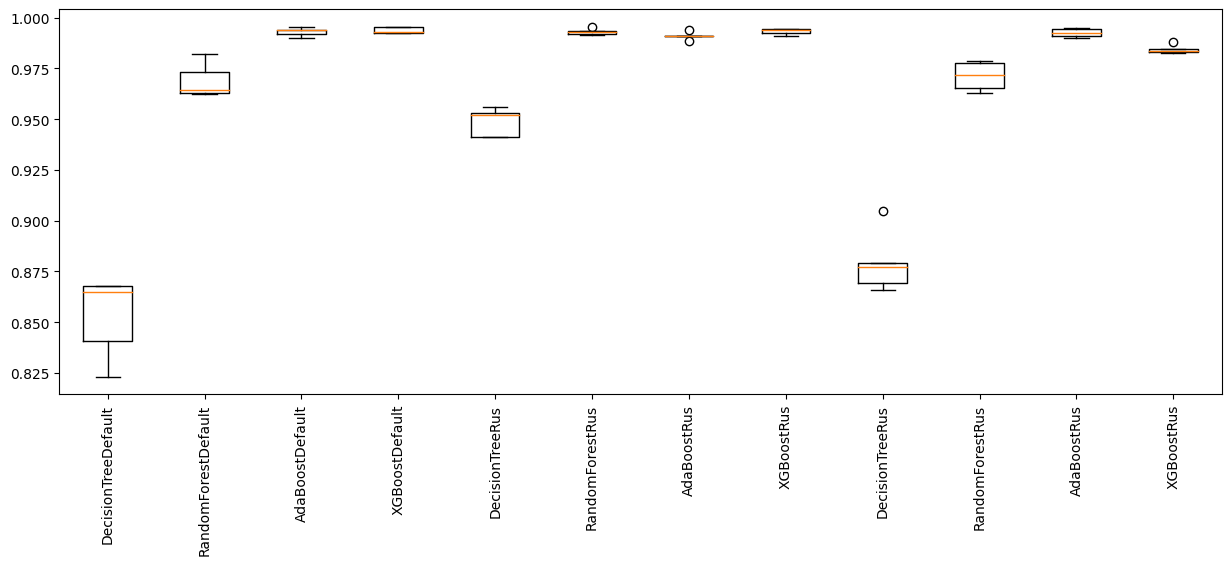

In [147]:
plt.figure(figsize=(15,5))
plt.boxplot(results)

ax = plt.gca()
plt.draw()
ax.set_xticklabels(names, rotation=90)

plt.show()

No geral percebe-se que os algoritmos de boosting performaram melhor (AdaBoost e XGBoost) e que a árvore de decisão apresentou os piores resultados da métrica escolhida

# Hiperparametros dos melhores modelos

## Função para testar o melhor modelo selecionado

In [ ]:
def AM(nome, modelo, X_treino, y_treino, X_teste, y_teste):
  np.random.seed(100)
  modelos = []
  model  = modelo
  model.fit(X_treino, y_treino)
  y_pred = model.predict(X_teste)

  acuracia = accuracy_score(y_teste, y_pred,)
  roc_auc = roc_auc_score(y_teste, y_pred)
  recall = recall_score(y_teste, y_pred, average='macro')
  precision = precision_score(y_teste, y_pred, average='macro')
  f1 = f1_score(y_teste, y_pred, average='macro')
  print(f'Modelo utilizado: {modelo}')
  print(f'Acuracia: {round(acuracia*100,2)}%')
  print(f'ROC_AUC: {round(roc_auc*100,2)}%')
  print(f'Recall {round(recall*100,2)}%')
  print(f'Precision {round(precision*100,2)}%')
  print(f'F1-score: {round(f1*100,2)}%')
  print(classification_report(y_teste, y_pred))

  cm = confusion_matrix(y_teste, y_pred, labels=model.classes_)

  sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
              xticklabels=['Sobreviveu','Óbito'], yticklabels=['Sobreviveu','Óbito'])

  y_pred_proba = modelo.predict_proba(X_teste)[::,1]
  fpr, tpr, _ = roc_curve(y_teste, y_pred_proba)
  auc = roc_auc_score(y_teste, y_pred_proba)

  plt.figure(figsize=(14,5))
  plt.plot(fpr,tpr)
  plt.title(f'Curva ROC {nome}', fontsize=18)
  plt.xlabel('Taxa falsos positivos', fontsize=16)
  plt.ylabel('Taxa verdadeiros positivos', fontsize=16)
  plt.plot([0,1],[0,1], color='blue', lw=2, linestyle='--')
  plt.xticks(np.arange(0.1,1.05,0.05))
  plt.show()

  return [f'{nome}', modelo, round(acuracia*100,4), round(roc_auc*100,4), recall*100, precision*100, f1*100]

## AdaBoost

In [183]:
np.random.seed(100)

models = []
results = []
names = []

kfold = StratifiedKFold(n_splits=5, shuffle=True)
rus = ('RandomUnderSampling',RandomUnderSampler())
smote = ('SMOTE', SMOTE())

ada = ('AdaBoost', AdaBoostClassifier())

models.append(('AdaBoostDefaultCV', Pipeline([ada])))
models.append(('AdaBoostRusCV', Pipeline(steps=[rus, ada])))
models.append(('AdaBoostRusCV', Pipeline(steps=[smote, ada])))

np.random.seed(100)

param_grid = {
    'AdaBoost__learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5],
    'AdaBoost__n_estimators': [50, 100, 150, 200]
    }

for name, model in models:
  grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, verbose=3, scoring='roc_auc',
                           cv=kfold)
  grid_search.fit(X_test, y_test)

  train_pred = grid_search.predict(X_train)
  gs_pred = grid_search.predict(X_test)

  print(f'Best model for {name}: {grid_search.best_estimator_}')
  print(f'ROC AUC treino: {round(roc_auc_score(y_train, train_pred),4)*100}%')
  print(f'ROC AUC test: {round(roc_auc_score(y_test, gs_pred),4)*100}%')
  print(classification_report(y_test, gs_pred))
  print('-----------------------------------------------------------------------')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best model for AdaBoostDefaultCV: Pipeline(steps=[('AdaBoost',
                 AdaBoostClassifier(learning_rate=0.1, n_estimators=200))])
ROC AUC treino: 81.55%
ROC AUC test: 82.66%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29376
           1       0.76      0.66      0.71       290

    accuracy                           0.99     29666
   macro avg       0.88      0.83      0.85     29666
weighted avg       0.99      0.99      0.99     29666

-----------------------------------------------------------------------
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best model for AdaBoostRusCV: Pipeline(steps=[('RandomUnderSampling', RandomUnderSampler()),
                ('AdaBoost',
                 AdaBoostClassifier(learning_rate=0.25, n_estimators=150))])
ROC AUC treino: 96.16%
ROC AUC test: 97.13000000000001%
              precision    recall  f1-s

Modelo com melhor performance para a métrica ROC AUC foi o ada boost com os dados balanceados da forma de undersampling com os hiperparametros AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

Modelo utilizado: AdaBoostClassifier(learning_rate=0.1, n_estimators=100)
Acuracia: 97.91%
ROC_AUC: 96.22%
Recall 96.22%
Precision 65.59%
F1-score: 72.95%
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29376
           1       0.31      0.94      0.47       290

    accuracy                           0.98     29666
   macro avg       0.66      0.96      0.73     29666
weighted avg       0.99      0.98      0.98     29666



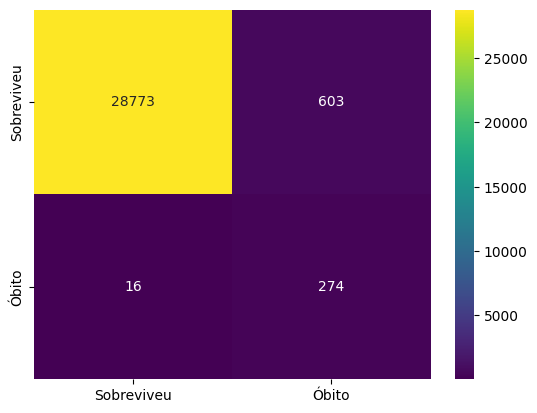

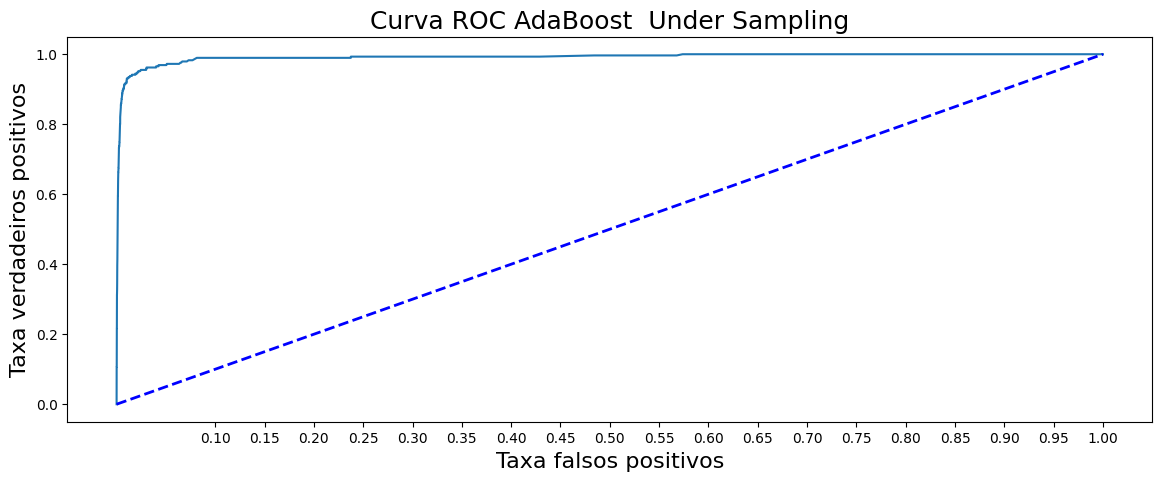

In [186]:
np.random.seed(100)

# Balanceamento com undersampling
rus = RandomUnderSampler(replacement=True)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Treino do melhor modelo de ada boost
rus_ada = AM('AdaBoost  Under Sampling',AdaBoostClassifier(learning_rate=0.1, n_estimators=100), X_rus, y_rus, X_test, y_test)

## XGBoost

In [188]:
np.random.seed(100)

models = []
results = []
names = []

kfold = StratifiedKFold(n_splits=5, shuffle=True)
rus = ('RandomUnderSampling',RandomUnderSampler())
smote = ('SMOTE', SMOTE())

ada = ('XGBoost', XGBClassifier())

models.append(('XGBoostDefaultCV', Pipeline([ada])))
models.append(('XGBoostRusCV', Pipeline(steps=[rus, ada])))
models.append(('XGBoostRusCV', Pipeline(steps=[smote, ada])))

np.random.seed(100)

param_grid = {
    'XGBoost__learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5],
    'XGBoost__n_estimators':[50, 100, 150, 200],
    'XGBoost__max_depth': [3,5,7,9,11]
    }

for name, model in models:
  grid_search = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs=-1, verbose=3, scoring='roc_auc',
                           cv=kfold)
  grid_search.fit(X_test, y_test)

  train_pred = grid_search.predict(X_train)
  gs_pred = grid_search.predict(X_test)

  print(f'Best model for {name}: {grid_search.best_estimator_}')
  print(f'ROC AUC treino: {round(roc_auc_score(y_train, train_pred),4)*100}%')
  print(f'ROC AUC test: {round(roc_auc_score(y_test, gs_pred),4)*100}%')
  print(classification_report(y_test, gs_pred))
  print('-----------------------------------------------------------------------')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best model for XGBoostDefaultCV: Pipeline(steps=[('XGBoost',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.25,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               

Modelo utilizado: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Acuracia: 96.15%
ROC_AUC: 96.86%
Recall 96.86%
Precision 59.96%
F1-score: 65.57%
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     29376
           1       0.20      0.98      0.33 

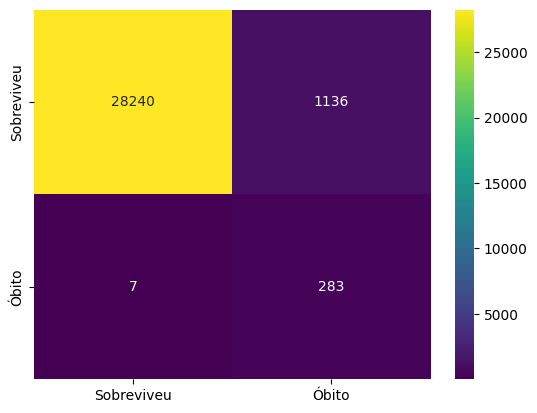

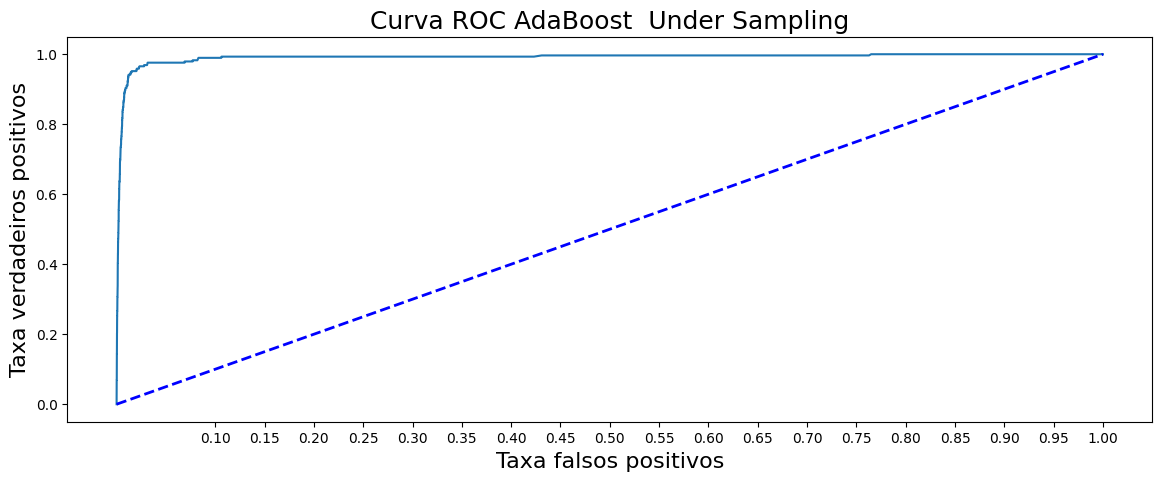

In [189]:
np.random.seed(100)

# Balanceamento com undersampling
rus = RandomUnderSampler(replacement=True)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Treino do melhor modelo de ada boost
rus_ada = AM('AdaBoost  Under Sampling',XGBClassifier(learning_rate=0.5, n_estimators=50, max_depth=11), X_rus, y_rus, X_test, y_test)

# Conclusão

* A primeira conclusão que pode ser feita foi que os modelos desempenharam melhor para a métrica de roc auc, após o balanceamento dos dados de treino
* No geral os modelos de Boosting desempenharam melhor (Ada Boosting e XGBoosting)
* Apesar de métricas muito semelhantes, o balanceamento com Undersampling foi mais efetivo, tanto pelo fato de processamento mais rápido, quanto ao fato de apresentar um ROC AUC ligeiramente superior
* O melhor modelo de AdaBoost foi capaz de classificar corretamente grande maioria dos casos tanto de sobrevivência quanto de óbito, apresentou uma distinção um pouco pior quando se trata da classificação de pacientes como sobreviventes e que na realidade vieram a óbito (Na minha opinião, o pior erro a ser cometido)
* O melhor modelo de XGBoost quase não cometeu erros em relação a esse último caso, porém classificou um número de pacientes muito superior como óbito e, esses pacientes, felizmente, sobreviveram.
* Feito as considerações, acredito que o modelo de XGBoost com undersampling apresentou a melhor performance entre os modelos